<a href="https://colab.research.google.com/github/Debtanu-Ghosh/Linear_Model_Practice/blob/main/lm_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Loading the data and gathering the information

*          How strong the relationship ?
*          What is the nature of the relationship ?

In [43]:
# Loading the train.csv
df_train = pd.read_csv("/content/train.csv")
df_train.sample(5)

,x,y
684,65.0,62.166753
555,43.0,44.707864
602,42.0,42.101409
561,31.0,33.942249
26,49.0,47.958833


In [44]:
# Taking all info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [45]:
# Dim of the dataset
df_train.shape

(700, 2)

In [46]:
# Taking the summary of data
df_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


# Checking the outliers

*   Using boxplot
*   IQR

Text(0.5, 1.0, 'Checking The Outliers')

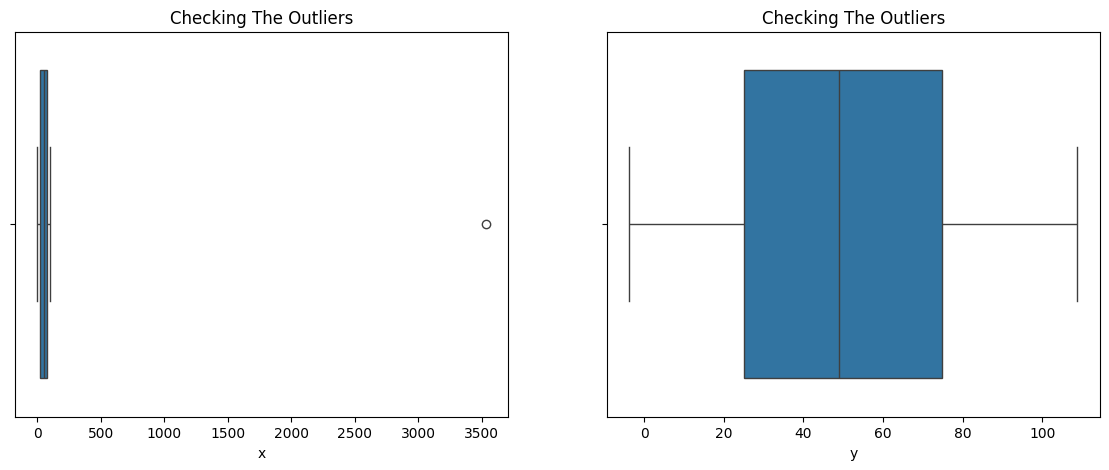

In [47]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.boxplot(df_train, x = 'x')
plt.title('Checking The Outliers')

plt.subplot(122)
sns.boxplot(df_train, x= 'y')
plt.title('Checking The Outliers')

In [48]:
df_train[df_train['x'] > 3000 ]

,x,y
213,3530.157369,NaN


*  **We have outlier on x**

### Finding inter quertile range

In [49]:
percentile25 = df_train['x'].quantile(0.25)
percentile75 = df_train['x'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

### Finding Outlier

In [50]:
df_train[df_train['x'] > upper_limit]

,x,y
213,3530.157369,NaN


In [51]:
df_train[df_train['x'] < lower_limit]

,x,y


# Remove Outlier

In [52]:
df_train = df_train[df_train['x'] < upper_limit]
df_train.shape

(699, 2)

Text(0.5, 1.0, 'After removing outlier')

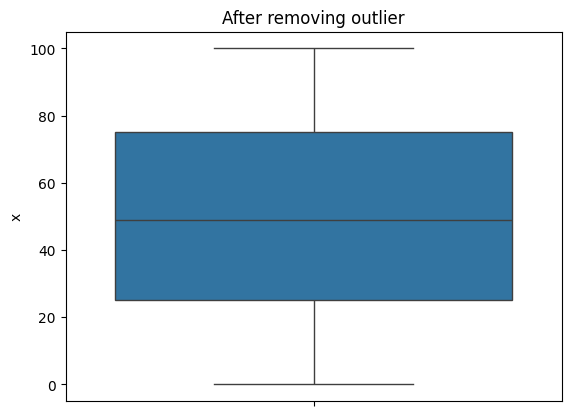

In [53]:
sns.boxplot(df_train['x'])
plt.title('After removing outlier')

### Viewing the relationship through scatter plot

Text(0.5, 1.0, 'Scatter plot b/w X(Indp. Var) and Y(Depn. Var)')

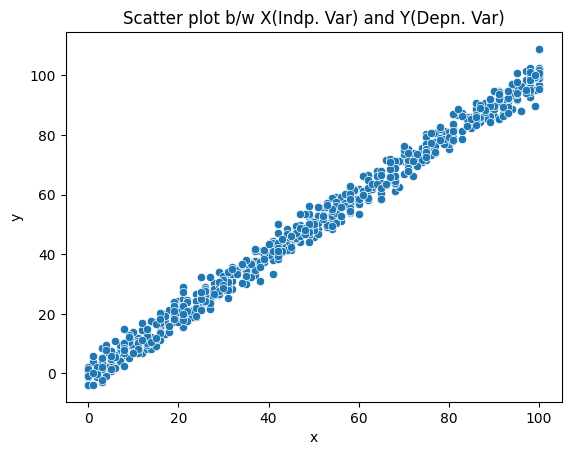

In [54]:
sns.scatterplot(df_train,x= 'x',y = 'y')
plt.title('Scatter plot b/w X(Indp. Var) and Y(Depn. Var)')

# Checking the Normality asumption

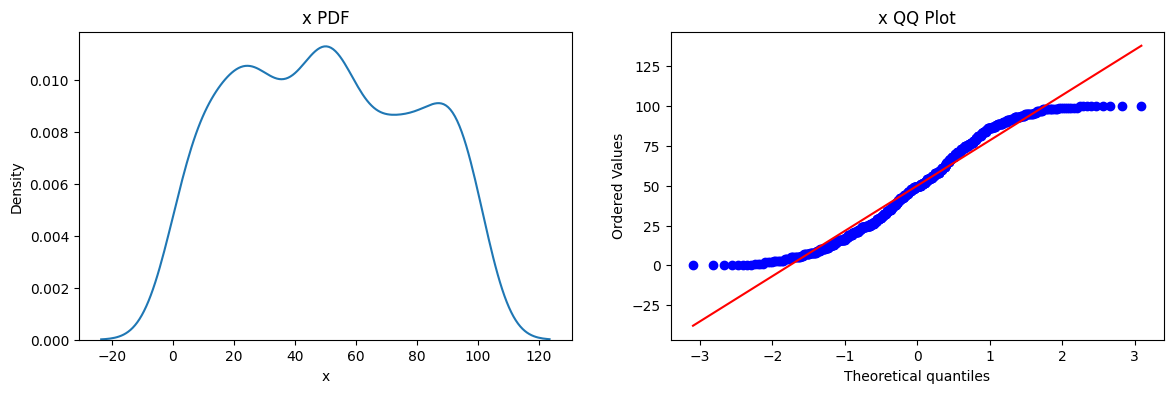

In [55]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df_train['x'])
plt.title('x PDF')

plt.subplot(122)
stats.probplot(df_train['x'], dist="norm", plot=plt)
plt.title('x QQ Plot')

plt.show()

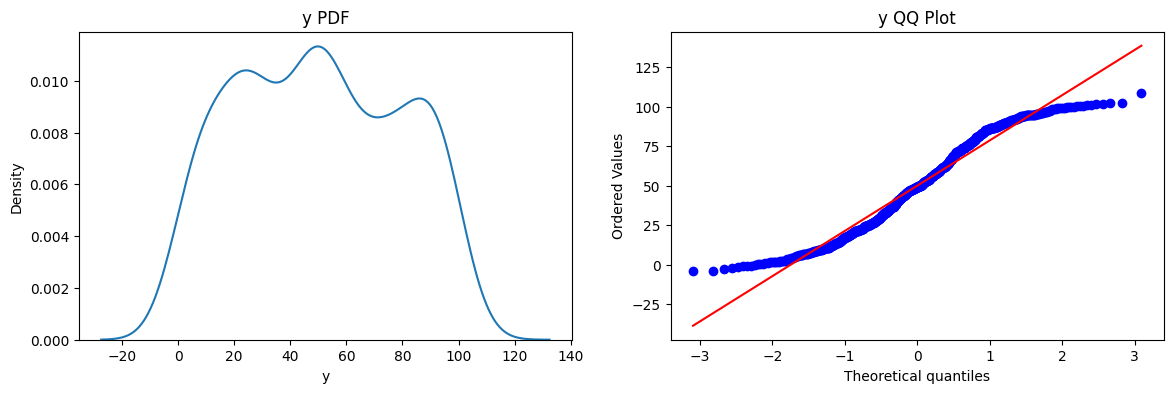

In [56]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df_train['y'])
plt.title('y PDF')

plt.subplot(122)
stats.probplot(df_train['y'], dist="norm", plot=plt)
plt.title('y QQ Plot')

plt.show()

# Checking the null values

In [57]:
df_train.isnull().sum()

x    0
y    0
dtype: int64

# Correlation matrix and heatmap

In [58]:
df_train.corr()

,x,y
x,1.00000,0.99534
y,0.99534,1.00000


<Axes: >

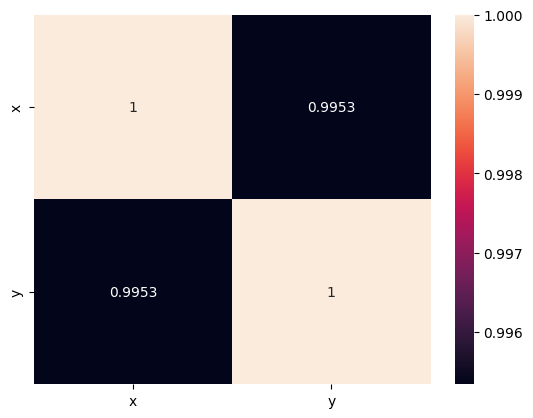

In [59]:
sns.heatmap(df_train.corr(),annot = True, fmt = ".4g")

# Creating the linear model class using OLS

In [60]:
class SimpleLinearModel:

    def __init__(self):

        self.coef_ = None
        self.inter_ = None
        self.r2 = None
        self.rss = None
        self.mse = None
        self.t_value = None
        self.p_value = None

    def fit(self,x,y):

        x_mean = x.mean()
        y_mean = y.mean()

        num = sum((x - x_mean)*(y - y_mean))
        den = sum((x - x_mean)**2)

        self.coef_ = num / den
        self.inter_ = y_mean - self.coef_ * x_mean

    def predict(self,x):

        return self.coef_* x + self.inter_

    def R2_score(self,x,y):

        num1 = sum(((self.coef_* x + self.inter_) - y.mean())**2)
        den1 = sum((y - y.mean())**2)

        self.r2 = num1/den1
        return self.r2

    def RSE(self,x,y):

        self.rss = (sum((((self.coef_* x + self.inter_) - y))**2/(y.shape[0]-2)))**0.5
        return self.rss

    def MSE(self,x,y):

        self.mse = sum(((self.coef_* x + self.inter_) - y)**2)/y.shape[0]
        return self.mse

    def statistics(self,x,alpha = 0.05,tail="two"):

        self.t_value = self.coef_/(self.rss/(sum(x**2) - (sum(x)/x.shape[0]))**0.5)
        if tail == "two":
            self.p_value = stats.t.sf(np.abs(self.t_value), df=len(x)-2) * 2
        elif tail == "left":
            self.p_value = stats.t.sf(self.t_value, df=len(x)-2)
        elif tail == "right":
            self.p_value = stats.t.sf(-self.t_value, df=len(x)-2)
        else:
             raise ValueError("Invalid tail argument. Use 'two', 'left', or 'right'.")

        if self.p_value > alpha:
            print("Accept the Null hypothesis.")
        else:
            print("Reject the Null hypothesis.")

        print(f"t statistic:  {self.t_value} || p_value: {self.p_value}")


# Indep and Depen variable

In [61]:
X = df_train.iloc[:,0]
y = df_train.iloc[:,1]

In [62]:
X.shape,y.shape

((699,), (699,))

# Model fitting and r2 score calculating

* H0 : There is no linear relationship b/w Y and X
* H1 : There is a linear relation b/w Y and X

In [63]:
lr = SimpleLinearModel()
lr.fit(X,y)

In [64]:
lr.coef_,lr.inter_

(1.0006563818563046, -0.10726546430100825)

In [65]:
y_pred = lr.predict(X)

In [66]:
y_pred

0      23.908488
1      49.925554
2      14.902580
3      37.917677
4      86.949840
         ...    
695    57.930805
696    92.953778
697    81.946558
698    65.936056
699    96.956404
Name: x, Length: 699, dtype: float64

In [67]:
lr.R2_score(X,y)

0.990701531902555

In [68]:
lr.MSE(X,y)

7.867752733487687

In [69]:
RMSE = (lr.MSE(X,y))**0.5
RMSE

2.8049514672250013

In [70]:
lr.RSE(X,y)

2.808972905085315

In [71]:
lr.statistics(X)

Reject the Null hypothesis.
t statistic:  544.1935846579546 || p_value: 0.0


Text(0, 0.5, 'Y')

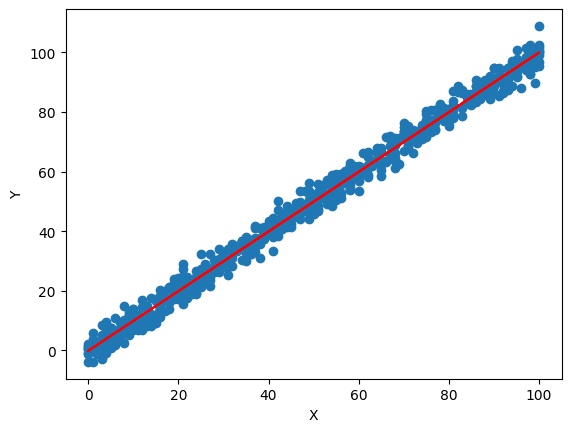

In [72]:
plt.scatter(df_train['x'],df_train['y'])
plt.plot(X,lr.predict(X),color='red')
plt.xlabel('X')
plt.ylabel('Y')

# Creating KFold Cross Validation function to validate our model

In [73]:
def Kfold_CV(model,X,y,k=5):

    n = len(X)
    fold_size = n // k
    indices = np.arange(n)
    np.random.shuffle(indices)
    scores = []

    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate((indices[:i * fold_size], indices[(i + 1) * fold_size:]))

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        model.fit(X_train, y_train)
        score = model.MSE(X_test, y_test)
        scores.append(score)

    return scores

In [74]:
CV = np.array(Kfold_CV(lr,df_train['x'].values,df_train['y'].values))
CV

array([7.86954767, 7.95952413, 8.31533546, 7.2182657 , 8.34102139])

In [75]:
CV.mean()

7.940738871059909

* Our model is good in the basis of r2 score
* cross validation score

# Predict using test.csv

In [76]:
df_test = pd.read_csv("/content/test.csv")
df_test.sample(5)

,x,y
123,12,7.468502
55,0,-1.040114
89,43,48.672526
167,66,67.220080
240,92,95.395800


In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [78]:
X_test = df_test.iloc[:,0]
y_test = df_test.iloc[:,1]

In [79]:
y_test_pred = lr.predict(X_test)

In [80]:
rss = lr.MSE(X_test, y_test)
rss

9.391647904234228

In [81]:
lr.R2_score(X_test,y_test)

0.9702921327808903

In [82]:
df_test['y_predict'] = y_test_pred

In [83]:
RSS = (y_test_pred - y_test)

In [84]:
df_test['Rsidual'] = RSS

In [85]:
df_test.sample(5)

,x,y,y_predict,Rsidual
184,37,34.124732,36.818152,2.693420
115,24,25.634763,23.759095,-1.875668
85,39,33.378344,38.827238,5.448894
130,64,67.386547,63.940809,-3.445738
179,72,74.689533,71.977152,-2.712381
